# Linear regression
    

In [42]:
#neew modules
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [43]:
auto = pd.read_csv('Auto.csv', na_values = ["?"]).dropna()
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [44]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [45]:
auto.shape

(392, 9)

In [46]:
#randome sample of the data set
auto.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
118,24.0,4,116.0,75.0,2158,15.5,73,2,opel manta
268,27.2,4,119.0,97.0,2300,14.7,78,3,datsun 510
308,33.5,4,151.0,90.0,2556,13.2,79,1,pontiac phoenix
61,21.0,4,122.0,86.0,2226,16.5,72,1,ford pinto runabout
350,34.7,4,105.0,63.0,2215,14.9,81,1,plymouth horizon 4


In [47]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [48]:
#linear regression
y = auto['mpg']
X = auto[['horsepower']].assign(intercept=1)

lr_model = sm.OLS(y,X)
results = lr_model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 25 May 2023   Prob (F-statistic):           7.03e-81
Time:                        23:03:39   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower    -0.1578      0.006    -24.489      0.0

Horsepower has a negative association with mpg, meaning that more cars with more power are less efficient (lower mpg).
The metric R-squared is equal to 0.6. This means that if we know the horsepower of a car, we can explain 60% of the variance of mpg.
The difference between the "vanilla" R-squared and the adjusted one is irrelevant, since we are using only two variables.
The F-statistic is quite high and the probability of such value ocurring by chance is extremely low. Thus we can conclude that at least one variable is associated with the dependent variable.
Regarding t-tests, both variables have low p-values and we can say they are both associated with the target.
The standard error of the coefficients estimation is also low, which makes the confidence interval narrow.
According to our model, an average horsepower of 104 yields 25 miles per gallon.
One nice property of the simple linear regression is that the r-squared is equal to the squared of the correlation coefficient between the response and the independent variable.



TO DO: compute confidence and prediction intervals for the mean.

In [49]:
auto['horsepower'].corr(auto['mpg'])**2


0.6059482578894348

In [50]:
(results.params*[104,1]).sum()

#(results.params * [104,1]).sum()

23.520008752390495

# data plots

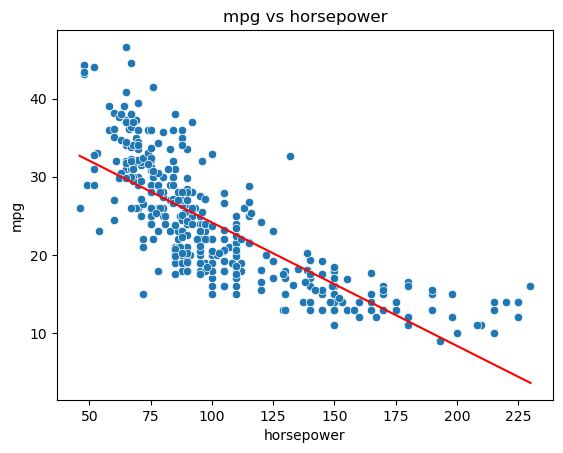

In [51]:
sample_X = np.linspace(X['horsepower'].min(), X['horsepower'].max(),100)
sample_y =results.params['intercept'] + sample_X * results.params['horsepower']


sns.scatterplot(x = X['horsepower'], y = y)
sns.lineplot(x = sample_X, y = sample_y, color = 'red')
plt.title('mpg vs horsepower')
plt.show()

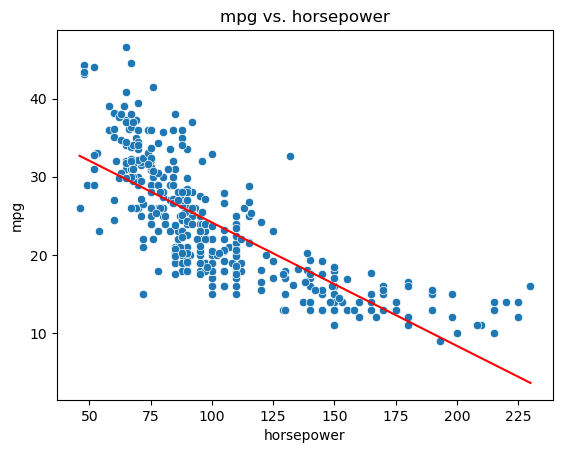

In [52]:
sample_X = np.linspace(X['horsepower'].min(), X['horsepower'].max(), 100)
sample_y = results.params['intercept'] + sample_X * results.params['horsepower']

sns.scatterplot(x = X['horsepower'], y = y)
sns.lineplot(x = sample_X, y = sample_y, color='red')
plt.title('mpg vs. horsepower')
plt.show()

# REPETIR CON PATSY

In [75]:
auto = pd.read_csv('Auto.csv', na_values = ["?"]).dropna()


y = auto['mpg']
x1= auto['horsepower']#.assign(intercept=1)
x2= auto['weight']
data = pd.DataFrame({"x1": x1, "x2": x2, "y":y}) 

data.sample

<bound method NDFrame.sample of         x1    x2     y
0    130.0  3504  18.0
1    165.0  3693  15.0
2    150.0  3436  18.0
3    150.0  3433  16.0
4    140.0  3449  17.0
..     ...   ...   ...
392   86.0  2790  27.0
393   52.0  2130  44.0
394   84.0  2295  32.0
395   79.0  2625  28.0
396   82.0  2720  31.0

[392 rows x 3 columns]>

In [76]:
model = smf.ols("y ~ x1 + x2", data)
result = model.fit()
print(result.summary())
result.rsquared
result.resid.head()
z, p = stats.normaltest(result.resid.values)
p
result.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Thu, 25 May 2023   Prob (F-statistic):          3.06e-104
Time:                        23:13:06   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6402      0.793     57.540      0.0

Intercept    45.640211
x1           -0.047303
x2           -0.005794
dtype: float64

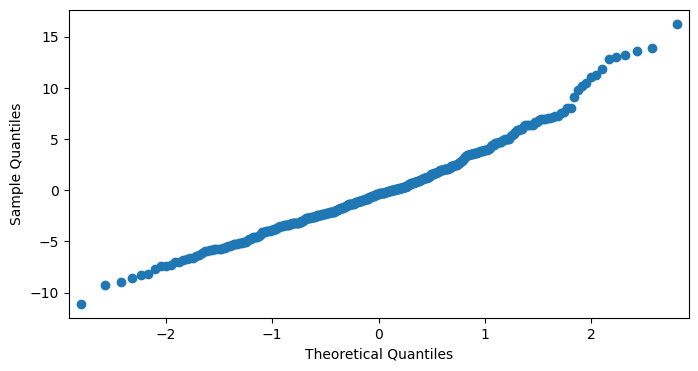

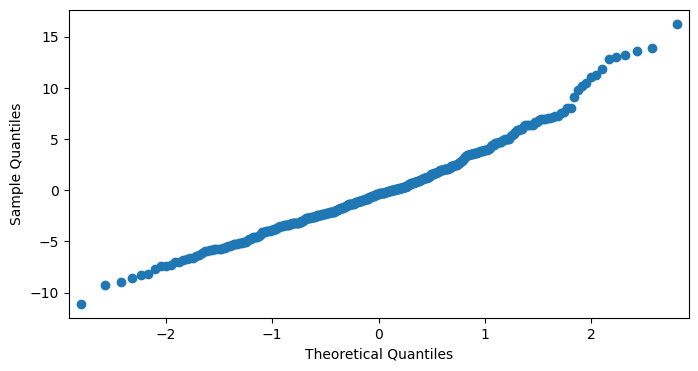

In [77]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     384.8
Date:                Thu, 25 May 2023   Prob (F-statistic):          7.26e-116
Time:                        23:15:35   Log-Likelihood:                -1090.7
No. Observations:                 392   AIC:                             2189.
Df Residuals:                     388   BIC:                             2205.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.5579      2.343     27.127      0.0

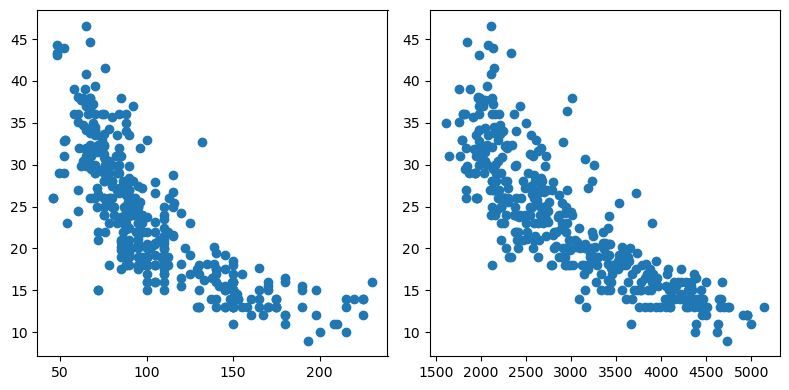

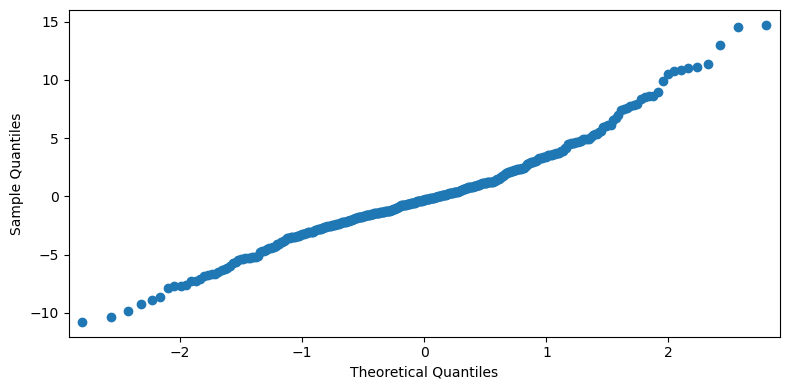

In [82]:
model = smf.ols("y ~ x1 + x2 + x1*x2" , data)
result = model.fit()
print(result.summary())


###############################################

#graphic and plot part

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].scatter(data["x1"], data["y"])
axes[1].scatter(data["x2"], data["y"])

fig.tight_layout()



fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

fig.tight_layout()


# Linear regression

In [ ]:
np.random.seed(123456789)
N = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)

y = auto['mpg']
X = auto[['horsepower']].assign(intercept=1)
data = pd.DataFrame({"x1": x1, "x2": x2}) #diccionario de variables
def y_true(x1, x2):
    return 1  + 2 * x1 + 3 * x2 + 4 * x1 * x2
data["y_true"] = y_true(x1, x2)

#Here we have stored the true value of
#y in the y_true column in the DataFrame object data.
#We simulate a noisy observation 
#of y by adding a normal distributed noise to the 
#true values and store the result in the y column:

e = np.random.randn(N)
data["y"] = data["y_true"] + e
data.head()

In [21]:

data.shape

(100, 4)

In [34]:
#########################################
########Model part########################
model = smf.ols("y ~ x1 + x2", data)
result = model.fit()
print(result.summary())
result.rsquared
result.resid.head()
z, p = stats.normaltest(result.resid.values)
p
result.params



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     29.76
Date:                Wed, 24 May 2023   Prob (F-statistic):           8.36e-11
Time:                        08:56:12   Log-Likelihood:                -271.52
No. Observations:                 100   AIC:                             549.0
Df Residuals:                      97   BIC:                             556.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9868      0.382      2.581      0.0

Intercept    0.986826
x1           1.081044
x2           3.079284
dtype: float64

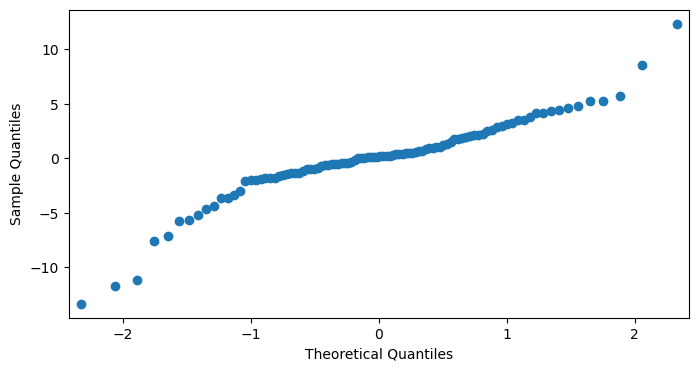

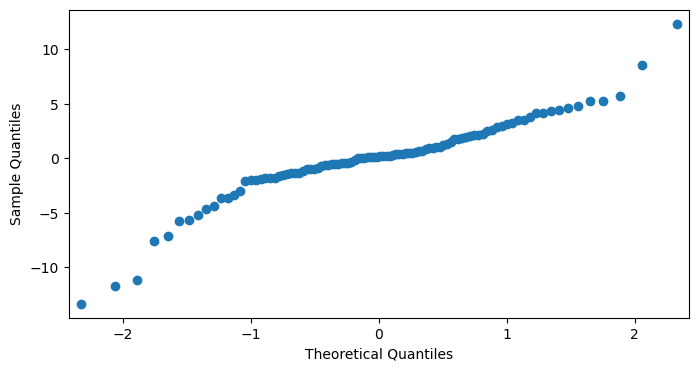

In [36]:
#sample vs theoretical: the resul is not good enough

fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     684.5
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.21e-64
Time:                        08:53:16   Log-Likelihood:                -140.01
No. Observations:                 100   AIC:                             288.0
Df Residuals:                      96   BIC:                             298.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8706      0.103      8.433      0.0

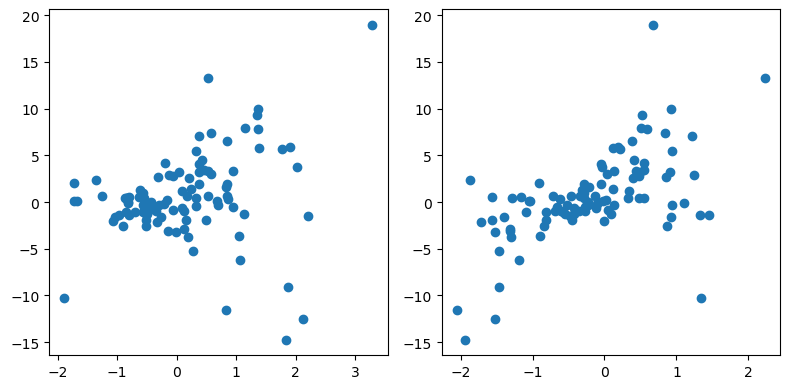

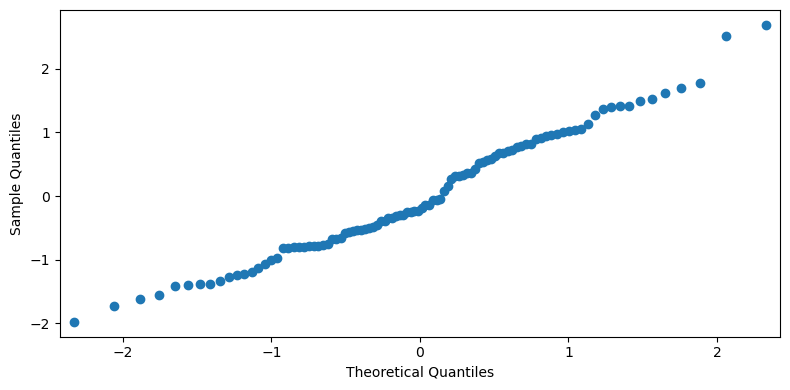

In [28]:
#model part 2


model = smf.ols("y ~ x1 + x2 + x1*x2", data)
result = model.fit()
print(result.summary())


###############################################

#graphic and plot part

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].scatter(data["x1"], data["y"])
axes[1].scatter(data["x2"], data["y"])

fig.tight_layout()



fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

fig.tight_layout()


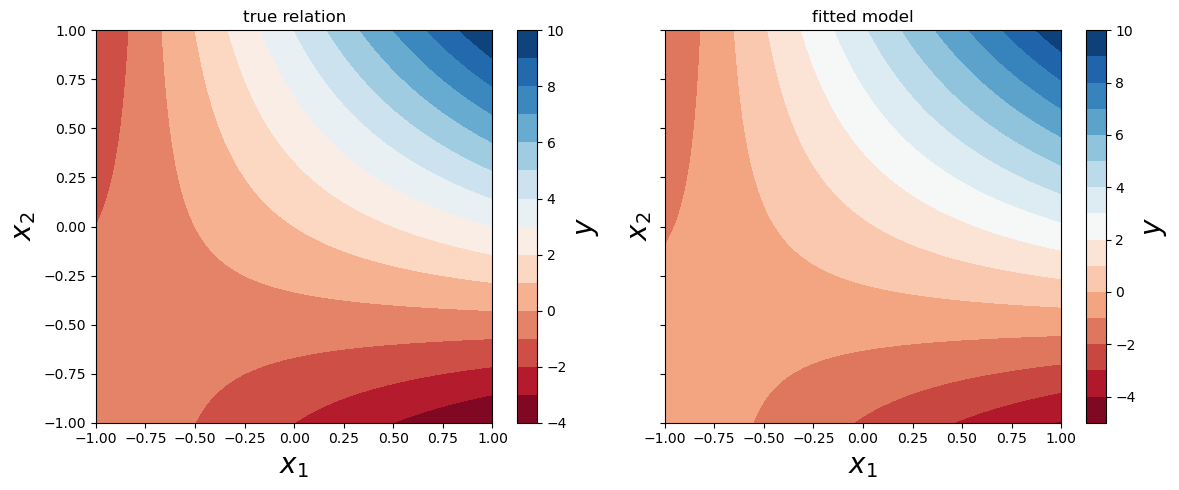

In [23]:
x = np.linspace(-1, 1, 50)
X1, X2 = np.meshgrid(x, x)
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})
y_pred = result.predict(new_data)
y_pred.shape
y_pred = y_pred.values.reshape(50, 50)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

def plot_y_contour(ax, Y, title):
    c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c, ax=ax)
    cb.set_label(r"$y$", fontsize=20)

plot_y_contour(axes[0], y_true(X1, X2), "true relation")
plot_y_contour(axes[1], y_pred, "fitted model")

fig.tight_layout()